In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import cv2
import os
import pickle
import joblib
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
dir='/content/drive/MyDrive/My projects/Handwritten digits recognition/digits/all/'
filenames = os.listdir(dir)

In [ ]:
# classes=[]
# i=0



# print(filenames)
# for filename in filenames:
#   i=i+1
#   c= filename.split(" ")[0] #taking out 1st character of our dataset to represent them in classes 
    
#   if c=='0':
#     classes.append(0)

#   elif c=='1':

#     classes.append(1)

#   elif c=='2':
#     classes.append(2)

#   elif c=='3':
#     classes.append(3)

#   elif c=='4':
#     classes.append(4)

#   elif c=='5':
#     classes.append(5)

#   elif c=='6':
#     classes.append(6)

#   elif c=='7':
#     classes.append(7)

#   elif c=='8':
#     classes.append(8)

#   elif c=='9':
#     classes.append(9)


# print(classes) 
# print(f"total num of items is {i}  " )





# # # df=pd.DataFrame({"filename":filenames})

In [ ]:
# import pandas as pd

# df = pd.DataFrame({"filename": filenames, "category": classes})
# # df["category"] = df["category"].replace({0: "cat", 1: "dog"})
# df["category"] = df["category"].replace({0: "digit_0", 1: "digit_1", 2:"digit_2",3:"digit_3",4:"digit_4",5: "digit_5", 6: "digit_6", 7:"digit_7",8:"digit_8",9:"digit_9"})

In [ ]:
# df.to_csv('/content/drive/MyDrive/My projects/Handwritten digits recognition/Nepali_digits.csv',index=False)

In [10]:
df=pd.read_csv("/content/drive/MyDrive/My projects/Handwritten digits recognition/Nepali_digits.csv")
df.head()

,filename,category
0,9 (135).png,digit_9
1,9 (1029).png,digit_9
2,9 (1895).png,digit_9
3,9 (129).png,digit_9
4,9 (1788).png,digit_9


In [11]:
df.category.value_counts()

digit_6    2000
digit_9    2000
digit_1    2000
digit_4    2000
digit_7    2000
digit_2    2000
digit_8    2000
digit_0    2000
digit_5    2000
digit_3    2000
Name: category, dtype: int64

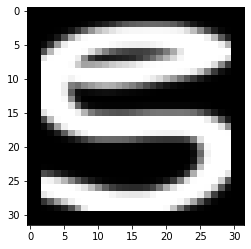

In [12]:
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

sample1 = random.choice(filenames)
image1 = load_img(dir + "/" + sample1)
plt.imshow(image1)

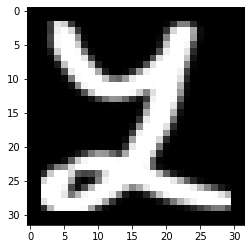

In [13]:
sample2 = random.choice(filenames)
image2 = load_img(dir + "/" + sample2)
plt.imshow(image2)

In [14]:
image2.size

(32, 32)

In [15]:
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 80
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
INPUT_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [17]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adadelta(),
    metrics=["accuracy"],
)

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [20]:
BATCH_SIZE = 16
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)

Found 16000 validated image filenames belonging to 10 classes.


In [21]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [22]:
BATCH_SIZE = 16
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)

Found 4000 validated image filenames belonging to 10 classes.


In [23]:
example_df = train_df.sample(n=1)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    color_mode="grayscale",
)

Found 1 validated image filenames belonging to 1 classes.


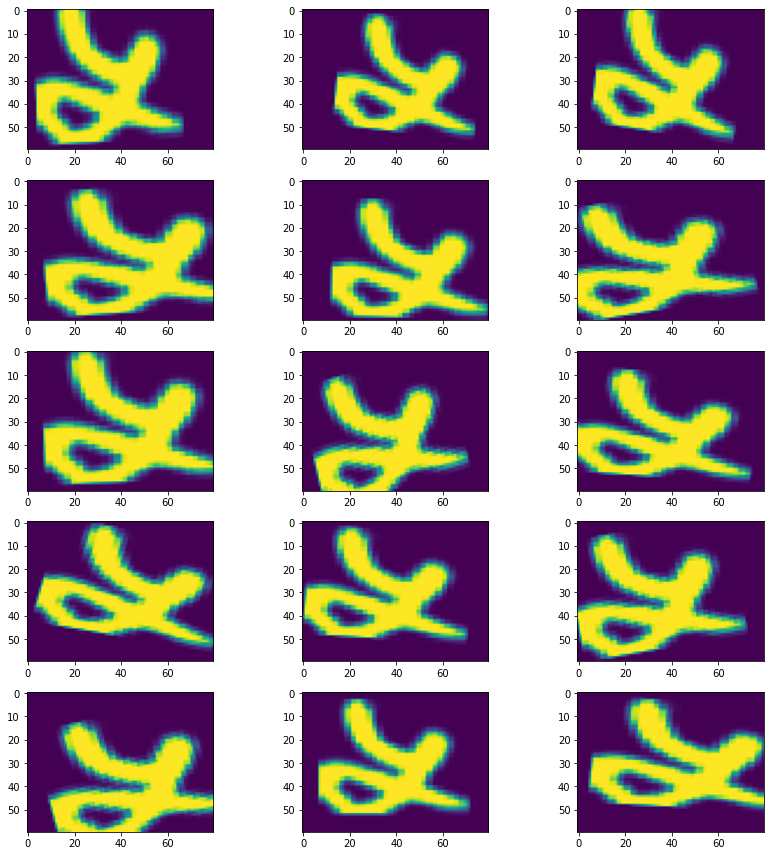

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i + 1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        image = image.reshape(IMAGE_SIZE)
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# img_size=50
# data=[]
# for c in category:
#   folder=os.path.join(dir,c)
#   label=category.index(c)
#   for img in os.listdir(folder):
#     img_path=os.path.join(folder,img)
#     img_arr=cv2.imread(img_path)
#     img_arr=cv2.resize(img_arr,(img_size,img_size))
    # data.append([img_arr, label])
    
    

In [25]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# save_model_name = 'vgg19_transfer_subcat.h5'
save_model_name = 'nepali_handwritten_digit.h5'
filepath = '/content/drive/MyDrive/Colab Notebooks/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')


In [72]:
start = time.time()
EPOCHS =1000
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_df.shape[0] // BATCH_SIZE,
    steps_per_epoch=30,
    # steps_per_epoch=train_df.shape[0] // BATCH_SIZE,
    callbacks=[earlyStopping, best_model, reduce_lr_loss]
)

elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

np.save('handwritten_digits_history.npy',history.history)

Epoch 1/1000
30/30 [==============================] - ETA: 0s - loss: 1.2064 - accuracy: 0.6167
Epoch 00001: val_accuracy did not improve from 0.70300
30/30 [==============================] - 32s 1s/step - loss: 1.2064 - accuracy: 0.6167 - val_loss: 1.0532 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 2/1000
30/30 [==============================] - ETA: 0s - loss: 1.2317 - accuracy: 0.5917
Epoch 00002: val_accuracy did not improve from 0.70300
30/30 [==============================] - 32s 1s/step - loss: 1.2317 - accuracy: 0.5917 - val_loss: 1.0545 - val_accuracy: 0.6892 - lr: 0.0010
Epoch 3/1000
30/30 [==============================] - ETA: 0s - loss: 1.2555 - accuracy: 0.5896
Epoch 00003: val_accuracy did not improve from 0.70300
30/30 [==============================] - 31s 1s/step - loss: 1.2555 - accuracy: 0.5896 - val_loss: 1.0564 - val_accuracy: 0.6992 - lr: 0.0010
Epoch 4/1000
30/30 [==============================] - ETA: 0s - loss: 1.2119 - accuracy: 0.5938
Epoch 00004: val_accuracy

In [73]:
NUM_SAMPLES = 40
sample_test_df = test_df.head(NUM_SAMPLES).reset_index(drop=True)
sample_test_datagen = ImageDataGenerator(rescale=1.0 / 255)
sample_test_generator = sample_test_datagen.flow_from_dataframe(
    sample_test_df,
    dir,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
)

Found 40 validated image filenames belonging to 9 classes.


In [74]:
import numpy as np
predict = model.predict(sample_test_generator)
print(predict)

predictions = np.argmax(predict, axis=-1)
print(predictions)


[[4.40436043e-03 7.86858127e-02 9.79937464e-02 1.16258629e-01
  4.59319092e-02 1.26524016e-01 4.10629869e-01 8.70651528e-02
  1.93587169e-02 1.31477946e-02]
 [2.74165720e-03 8.43430281e-01 9.78323910e-03 5.07503934e-03
  2.70783119e-02 1.59479748e-03 1.92627925e-02 3.41448397e-03
  4.09853738e-03 8.35208967e-02]
 [1.86677300e-03 1.41788297e-03 4.43566024e-01 4.16059852e-01
  4.15719254e-03 7.98308849e-02 2.83627231e-02 6.86717592e-03
  1.19754681e-02 5.89594198e-03]
 [2.71246918e-02 4.05677501e-03 1.25143211e-02 8.60410929e-03
  2.91933934e-03 8.97039566e-03 2.48612016e-02 8.69194791e-03
  8.96381974e-01 5.87522285e-03]
 [7.63935503e-04 6.89863344e-04 5.24438396e-02 1.22023202e-01
  2.12327074e-02 7.48870730e-01 2.61285156e-02 1.19004892e-02
  1.04277730e-02 5.51896496e-03]
 [9.62363422e-01 1.04041502e-03 6.24196022e-04 5.49322634e-04
  6.96908683e-05 3.97461663e-05 2.47494178e-03 1.93833895e-02
  1.12819076e-02 2.17308570e-03]
 [2.01759554e-04 7.58916605e-04 1.86239779e-02 5.02300449e

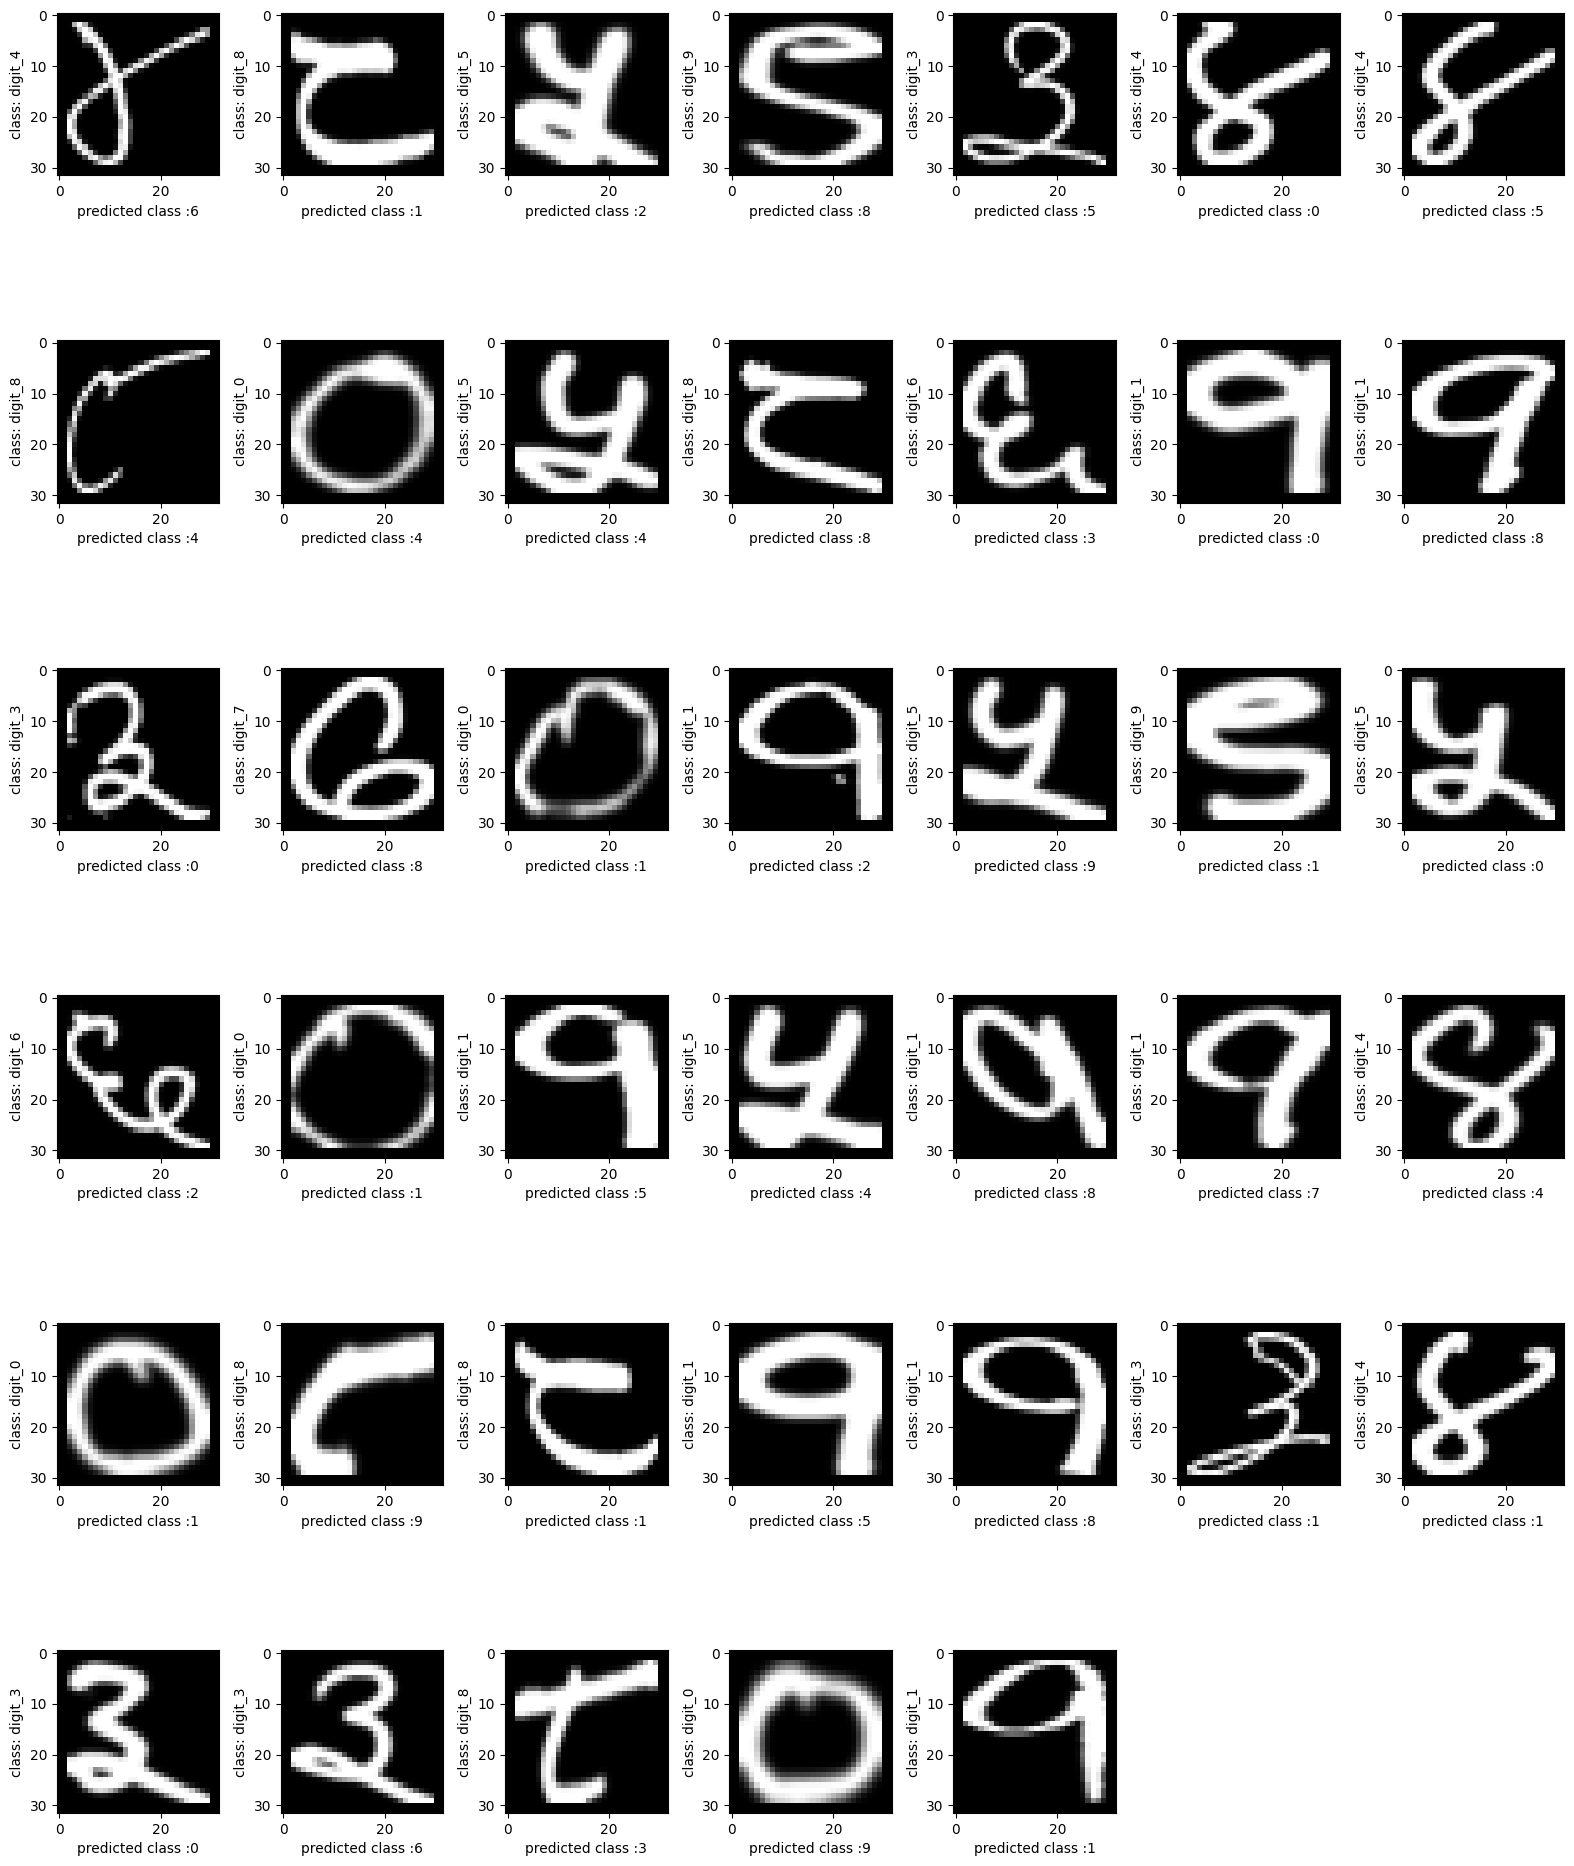

In [75]:
plt.figure(figsize=(16,20),dpi=99)


for index, row in sample_test_df.iterrows():
    
    filename = row["filename"]
    category=row["category"]
    prediction = predictions[index]

    img = load_img(dir + "/" + filename)
    plt.subplot(6, 7, index + 1)
    plt.imshow(img)
    plt.ylabel("class: "+category)
    plt.xlabel("predicted class :"+str(prediction))
plt.tight_layout()
plt.show()


In [ ]:
# import pickle
# import joblib
# filename = '/content/drive/MyDrive/My projects/Handwritten digits recognition/finalized_model.sav'
# joblib.dump(model, filename)
# pickle.dump(model, open(filename, 'wb'))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


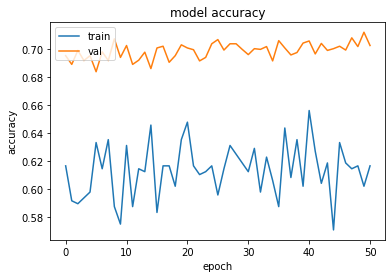

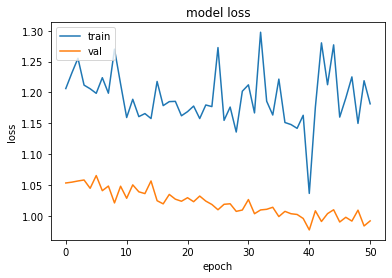

In [76]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [77]:
# confusion matrix for multiclass prediction results
# del test_pred, test_true
test_pred = model.predict(test_generator)
test_true = truth_labels(test_generator, BATCH_SIZE)
classes = test_generator.class_indices
test_pred_top1 = pred_class(test_pred)
test_true_top1 = pred_class(test_true)
acc_test = acc_cal(test_pred_top1, test_true_top1)
print('Test accuracy = ',acc_test)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_true_top1, test_pred_top1)
print('Confusion matrix for test dataset')
print(cnf_matrix)

Test accuracy =  0.10575
Confusion matrix for test dataset
[[36 35 21 32 46 30 40 42 47 53]
 [44 45 39 40 46 45 31 22 46 44]
 [40 38 39 40 44 36 40 38 35 37]
 [44 44 29 47 46 31 39 40 53 40]
 [39 37 38 39 37 33 41 41 42 50]
 [49 32 39 41 47 37 48 36 43 40]
 [50 45 32 36 40 40 45 43 36 46]
 [36 51 34 44 49 51 36 35 40 37]
 [43 34 40 35 45 40 38 46 58 50]
 [40 51 25 36 41 27 30 27 31 44]]


In [67]:
# calculate the prediction class result
import math

def pred_class(input_probs):
  class_top1 = []
  index_top1 = np.argmax(input_probs, axis = 1)
  class_top1 = (index_top1 + 1)
  return class_top1

def acc_cal(pred, truth):
  accuracy_class = int((pred == truth).sum())/ int(len(truth))
  return accuracy_class

def truth_labels(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    labels_list = []
    for i in range(0,int(number_of_generator_calls)):
        labels_list.extend(np.array(generator[i][1]))
    return labels_list

In [68]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, BATCH_SIZE)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, 40), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(4000,) (4000,) 0.105
[ 1  6  5  3  4 10  5  3  5  7  1  8 10  8  3  4  4  1  4  7  5  6  2  1]
[ 6  2  1  4  3  6  2 10  9  7  4  3  7  9  5  3  9  7  5  5  8  2  7  4]


In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.72)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


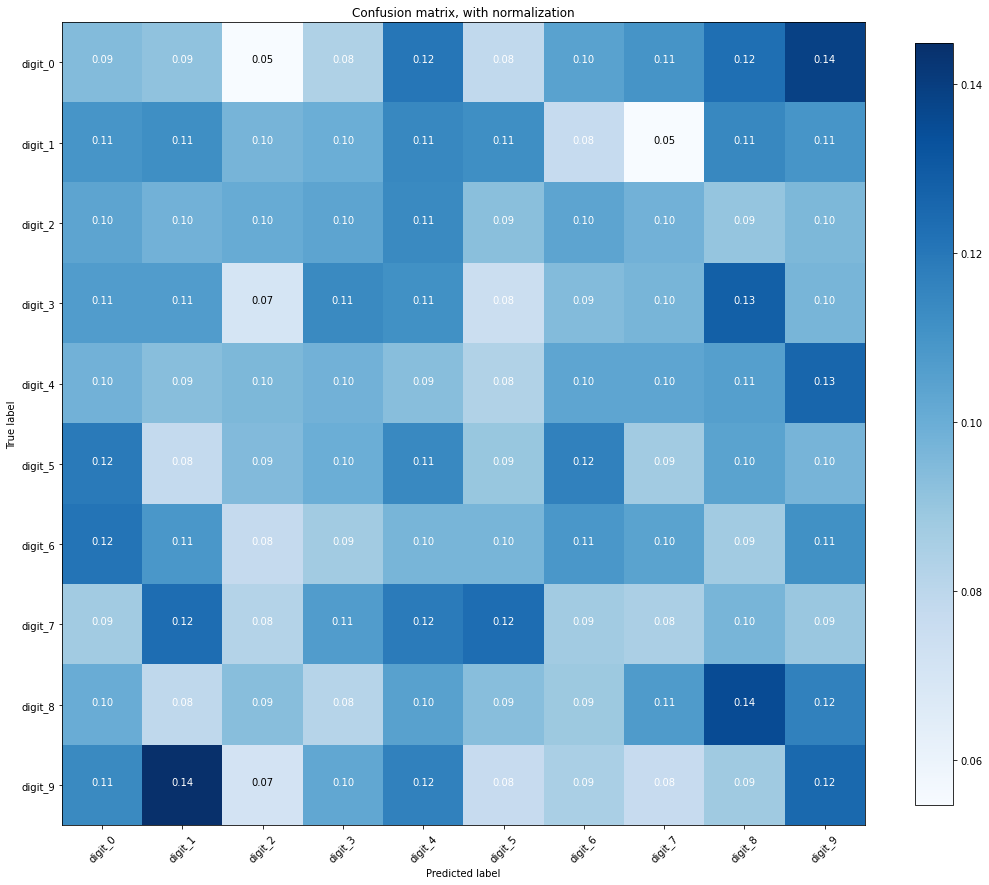

In [79]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=True,
                      title='Confusion matrix, with normalization')

Confusion matrix, without normalization


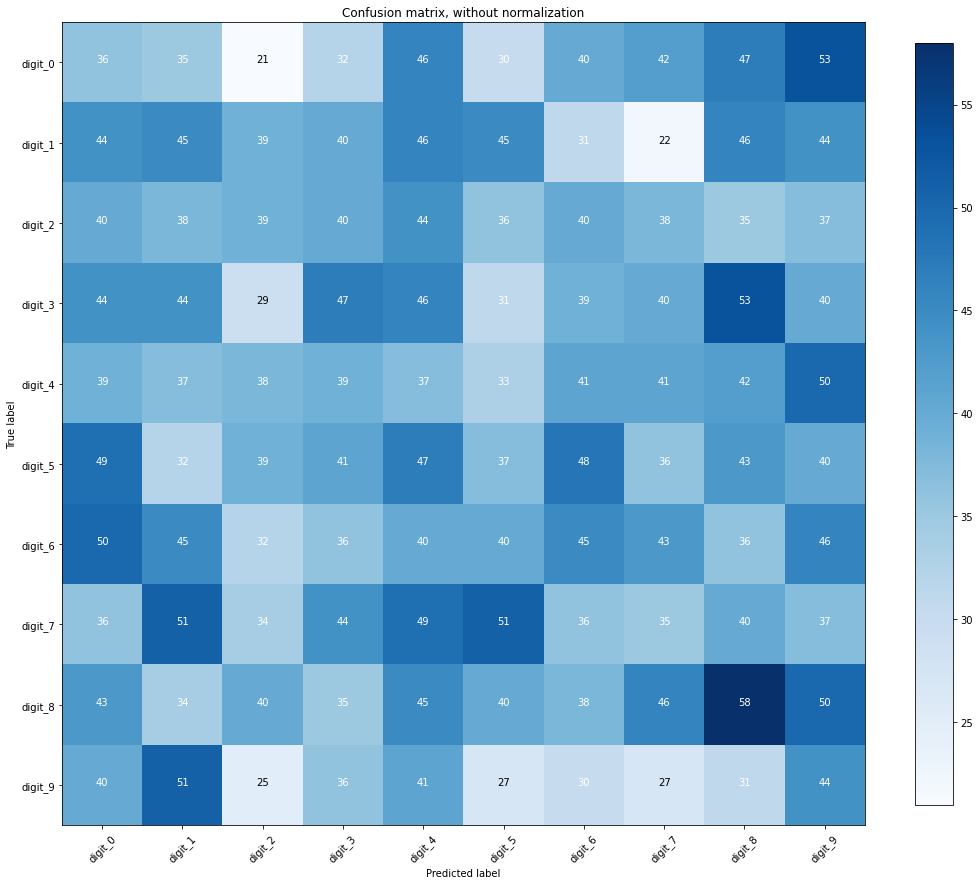

In [80]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=classes,normalize=False,
                      title='Confusion matrix, without normalization')